#Comprehensive Assessment : Deep Learning - Predicting Diabetes Progression using Artificial Neural Networks

###Objective:
You are required to model the progression of diabetes using the available independent variables. This model will help healthcare professionals understand how different factors influence the progression of diabetes and potentially aid in designing better treatment plans and preventive measures. The model will provide insights into the dynamics of diabetes progression in patients.

###Dataset:
Use the Diabetes dataset available in the sklearn library.
###Key components to be fulfilled :

####1.Loading and Preprocessing

Load the Diabetes dataset from sklearn.
Handle any missing values if present.
Normalize the features to ensure better performance of the ANN model.

####2.Exploratory Data Analysis (EDA)

Perform EDA to understand the distribution of features and the target variable.
Visualize the relationships between features and the target variable.

####3.Building the ANN Model

Design a simple ANN architecture with at least one hidden layer.
Use appropriate activation functions .

####4.Training the ANN Model

Split the dataset into training and testing sets.
Train the model on the training data.
Use an appropriate loss function and optimizer.

####5.Evaluating the Model

Evaluate the model on the testing data.
Report the performance metrics (e.g., Mean Squared Error, R² Score).

####6.Improving the Model

Experiment with different architectures, activation functions, or hyperparameters to improve the model performance.
Report the changes made and the corresponding improvement in performance.


##DATA LOADING

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Load the diabetes dataset
diabetes = load_diabetes()

# Create a DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
df.shape

(442, 11)

In [ ]:
# Check for missing values
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


No Missing Values.

In [ ]:
# Check for duplicates values
df.duplicated().sum()

0

No Duplicates.

###Description:

This dataset contains 10 baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements from 442 diabetes patients, along with a quantitative measure of disease progression one year after baseline.

Number of Instances: 442

Number of Attributes: 10 numeric predictive variables and 1 target variable

Attribute Information:

1. age: Age in years
2. sex: Sex (male/female)
3. bmi: Body mass index
4. bp: Average blood pressure
5. s1: Total serum cholesterol (tc)
6. s2: Low-density lipoproteins (ldl)
7. s3: High-density lipoproteins (hdl)
8. s4: Total cholesterol/HDL
9. s5: Log of serum triglycerides level (ltg)
10. s6: Blood sugar level (glu)
11. target: Quantitative measure of disease progression one year after baseline

Target Variable: Disease progression (continuous)

Data Type: Numeric

Missing Values: None

Task: Regression

This dataset is suitable for regression tasks, such as predicting disease progression.


##Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


count = The number of non-null values.

mean = Avarage.

Standard Deviation (std)= A measure of the spread of the variable's values around the mean. A higher standard deviation indicates greater variability in the data.

min = The smallest value.

25% = It represents the value below which 25% of the data fall

50% = It represents the value below which 50% of the data fall

75% = It represents the value below which 75% of the data fall

max = The largest value.

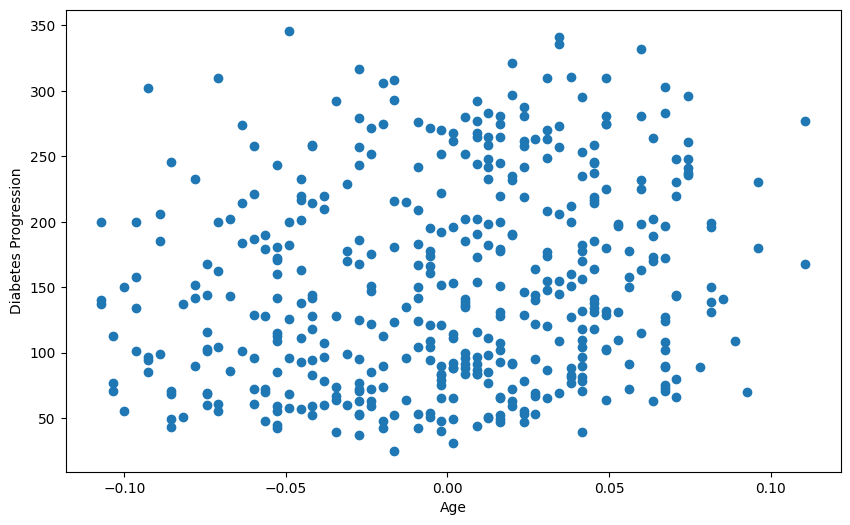

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['age'],y)
plt.xlabel('Age')
plt.ylabel('Diabetes Progression')
plt.show()

In [ ]:
s=df.sex.value_counts()

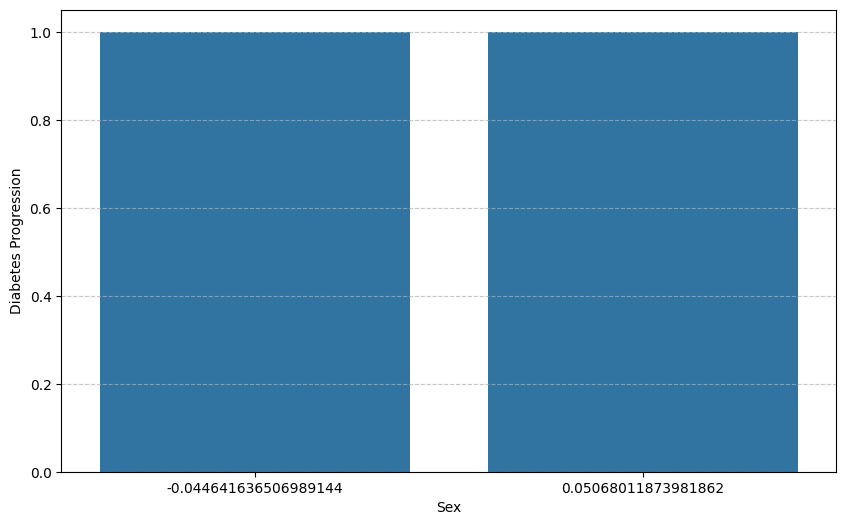

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(s)
plt.xlabel('Sex')
plt.ylabel('Diabetes Progression')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

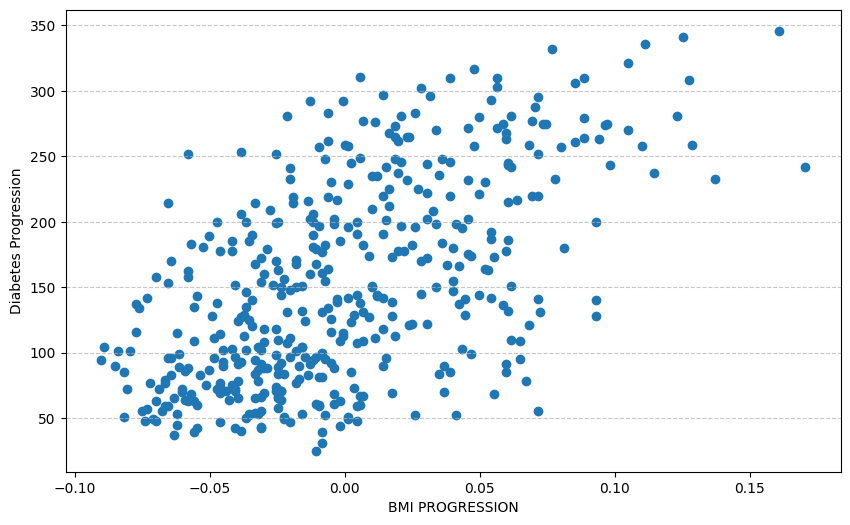

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['bmi'],df['target'])
plt.xlabel('BMI PROGRESSION')
plt.ylabel('Diabetes Progression')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

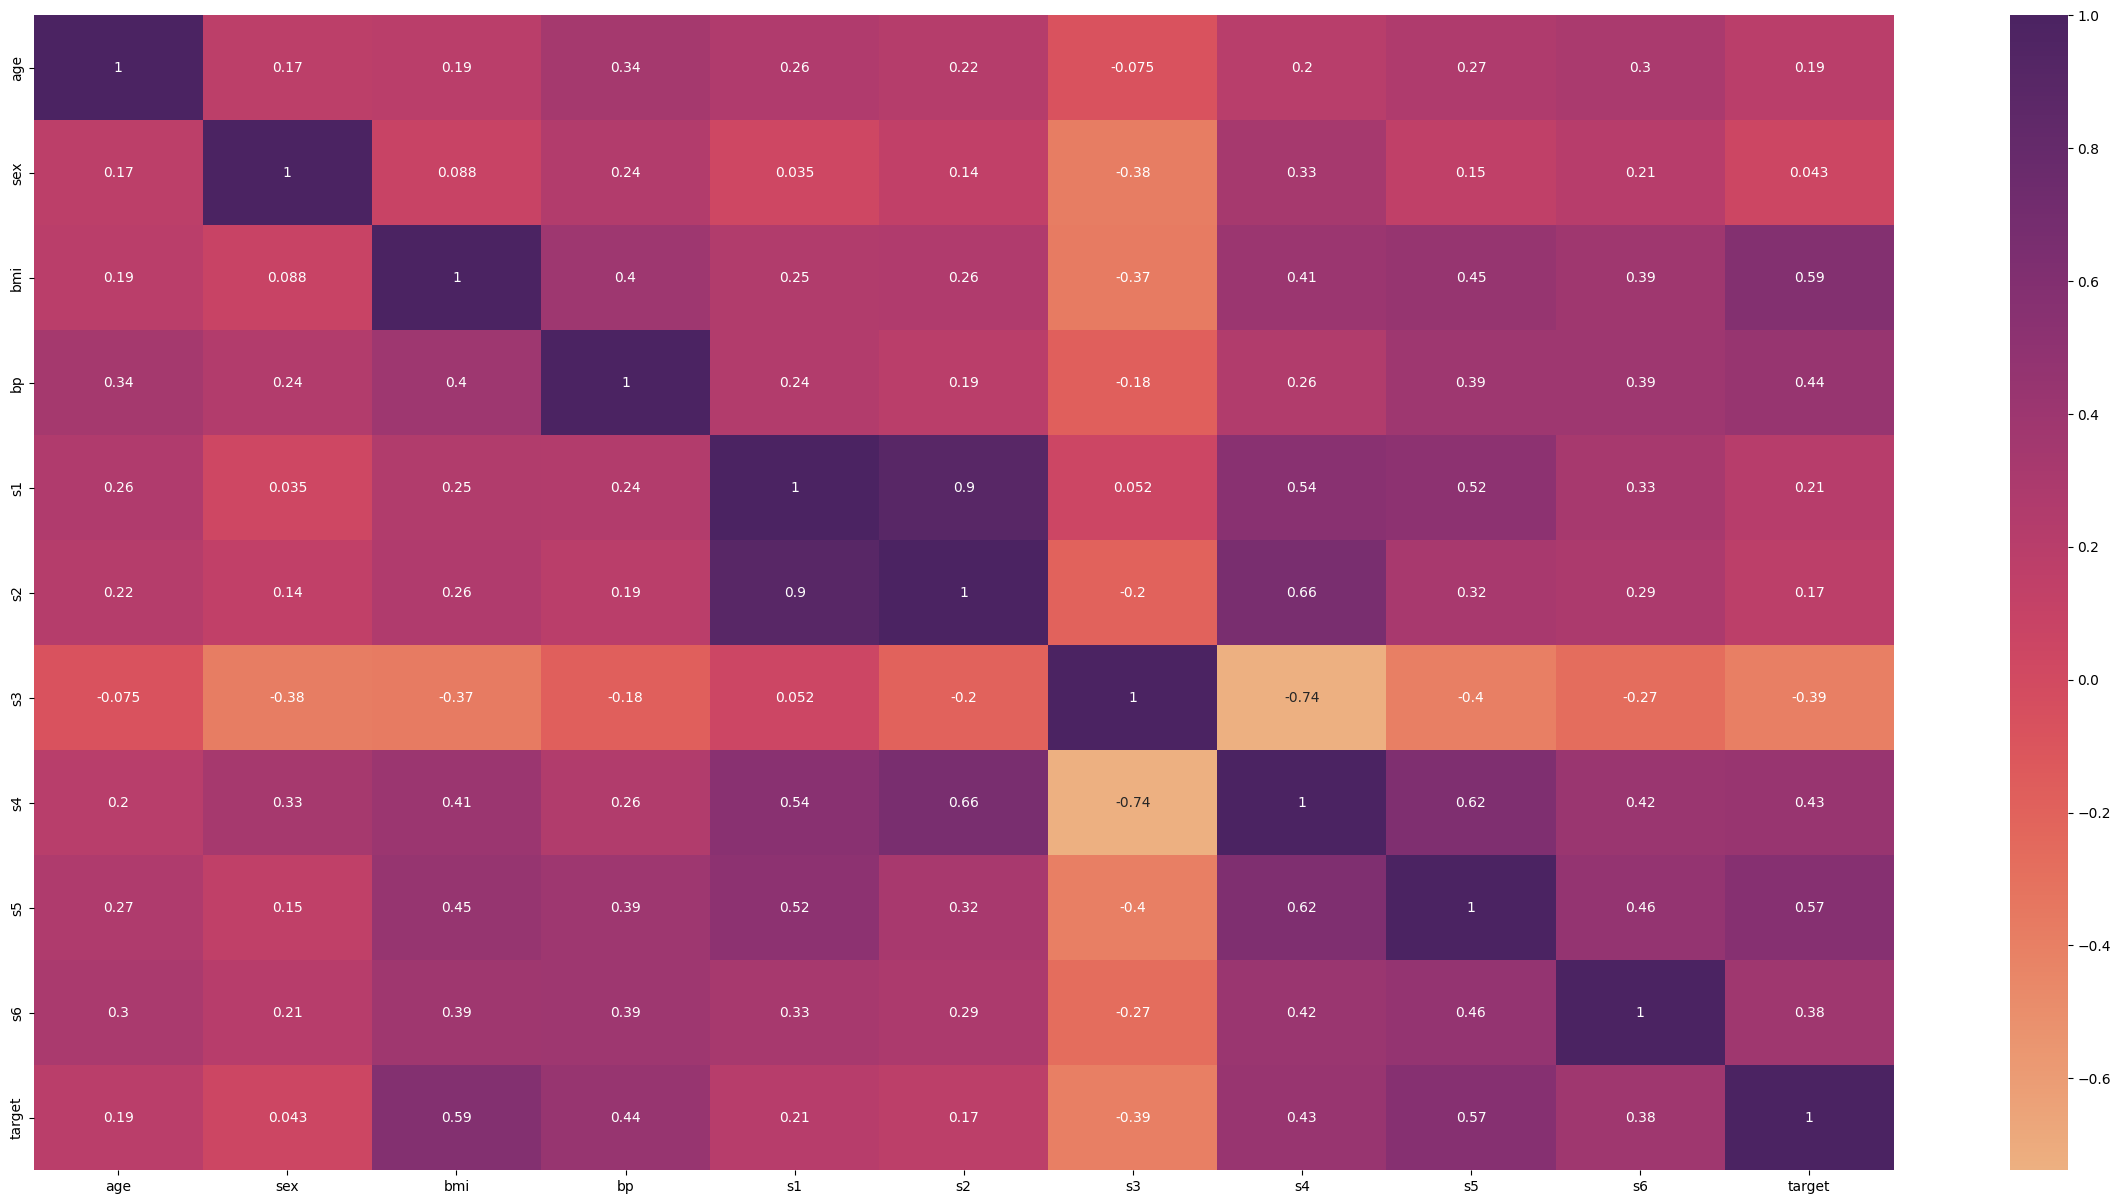

In [ ]:
# Correlation Analysis

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix,annot=True,cmap='flare')
plt.show()

In [ ]:
# Skewness
skewness = df.skew()
print("Skewness:\n", skewness)

Skewness:
 age      -0.231382
sex       0.127385
bmi       0.598148
bp        0.290658
s1        0.378108
s2        0.436592
s3        0.799255
s4        0.735374
s5        0.291754
s6        0.207917
target    0.440563
dtype: float64



Mildly Skewed Variables:

1. age (-0.231382) - Left-skewed (negative values)
2. s5 (0.291754) - Right-skewed (positive values)
3. s6 (0.207917) - Right-skewed (positive values)
4. bp (0.290658) - Right-skewed (positive values)

Moderately Skewed Variables:

1. sex (0.127385) - Nearly symmetric (close to 0)
2. s1 (0.378108) - Right-skewed
3. s2 (0.436592) - Right-skewed
4. target (0.440563) - Right-skewed

Highly Skewed Variables:

1. bmi (0.598148) - Right-skewed
2. s3 (0.799255) - Right-skewed
3. s4 (0.735374) - Right-skewed

In [ ]:
#kurtosis
kurtosis=df.kurtosis()
print("kurtosis:\n", kurtosis)

kurtosis:
 age      -0.671224
sex      -1.992811
bmi       0.095094
bp       -0.532797
s1        0.232948
s2        0.601381
s3        0.981507
s4        0.444402
s5       -0.134367
s6        0.236917
target   -0.883057
dtype: float64


Platykurtic (Light-tailed) Variables:

1. sex (-1.992811) - Flatter distribution
2. target (-0.883057) - Flatter distribution
3. target_sqrt (-1.072349) - Flatter distribution
4. age (-0.671224) - Flatter distribution
5. bp (-0.532797) - Flatter distribution
6. s5 (-0.134367) - Slightly flatter distribution

Mesokurtic (Normal-tailed) Variables:

1. bmi (0.095094) - Close to normal distribution
2. s6 (0.236917) - Slightly heavier tails

Leptokurtic (Heavy-tailed) Variables:

1. s1 (0.232948) - Heavier tails
2. s2 (0.601381) - Heavier tails
3. s3 (0.981507) - Heavier tails
4. s4 (0.444402) - Heavier tails

Kurtosis values range from:

- -3 (extremely platykurtic) to 3 (extremely leptokurtic)
- -1 to 1 (mildly platykurtic or leptokurtic)
- 0 (mesokurtic, normal distribution)

In [ ]:
# Square root transformation
df1 = np.sqrt(df + abs(df.min()) + 1)
df1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,1.070188,1.046576,1.073299,1.065022,1.040460,1.039612,1.029032,1.036244,1.070516,1.058358,13.304135
1,1.051353,1.000000,1.019216,1.042147,1.057512,1.047115,1.084767,1.018283,1.028477,1.022528,10.049876
2,1.092028,1.046576,1.065235,1.052012,1.039799,1.039913,1.034384,1.036244,1.062525,1.054437,12.922848
3,1.009040,1.000000,1.038595,1.037180,1.067226,1.067990,1.032603,1.053899,1.071814,1.062264,15.231546
4,1.054803,1.000000,1.026592,1.065022,1.063351,1.063583,1.053779,1.036244,1.045997,1.044570,12.688578
...,...,...,...,...,...,...,...,...,...,...,...
437,1.071883,1.046576,1.053535,1.082655,1.058812,1.055010,1.036163,1.036244,1.075774,1.070034,14.282857
438,1.049624,1.046576,1.036518,1.022134,1.084492,1.093059,1.036163,1.053899,1.052608,1.087314,11.401754
439,1.071883,1.046576,1.036518,1.062870,1.043761,1.049654,1.037938,1.032141,1.038853,1.073898,12.569805
440,1.030414,1.000000,1.062703,1.055279,1.069158,1.063436,1.036163,1.050216,1.081955,1.054437,15.684387


In [ ]:
skewness = df1.skew()
print("Skewness:\n", skewness)
print()
kurtosis=df1.kurtosis()
print("kurtosis:\n", kurtosis)

Skewness:
 age      -0.272611
sex       0.127385
bmi       0.543224
bp        0.246503
s1        0.313131
s2        0.362012
s3        0.726992
s4        0.674815
s5        0.236202
s6        0.139705
target    0.145039
dtype: float64

kurtosis:
 age      -0.653144
sex      -1.992811
bmi      -0.011842
bp       -0.552016
s1        0.166197
s2        0.475234
s3        0.786707
s4        0.303659
s5       -0.181237
s6        0.208503
target   -1.072349
dtype: float64


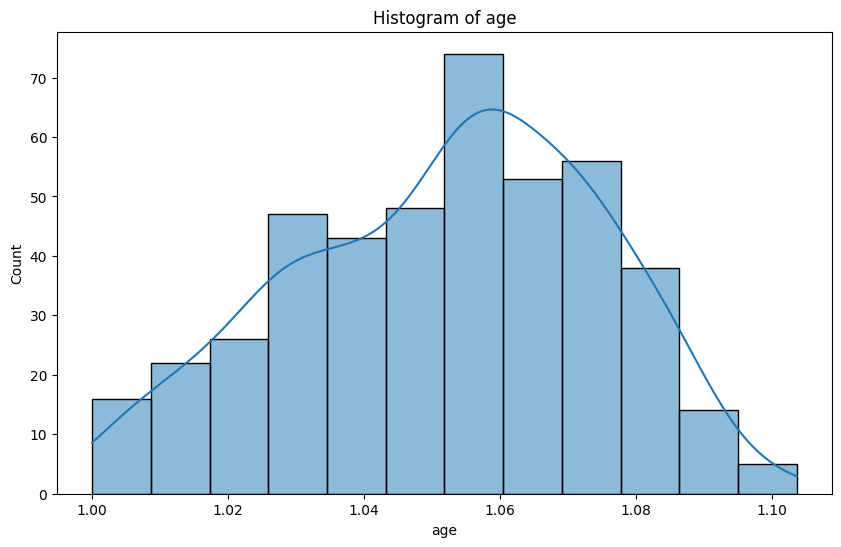

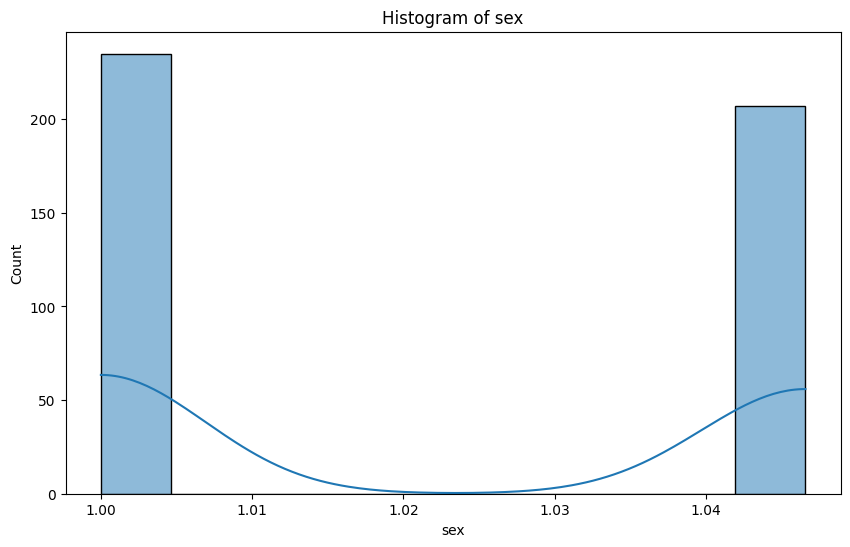

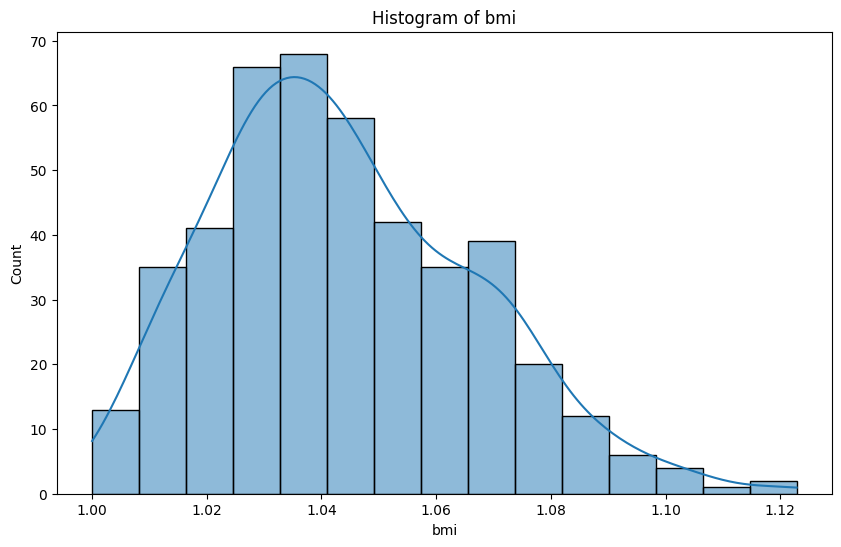

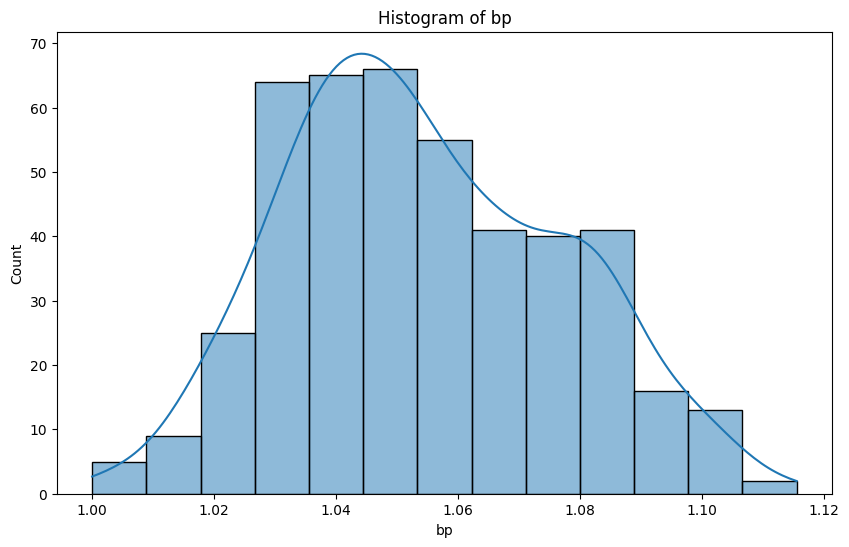

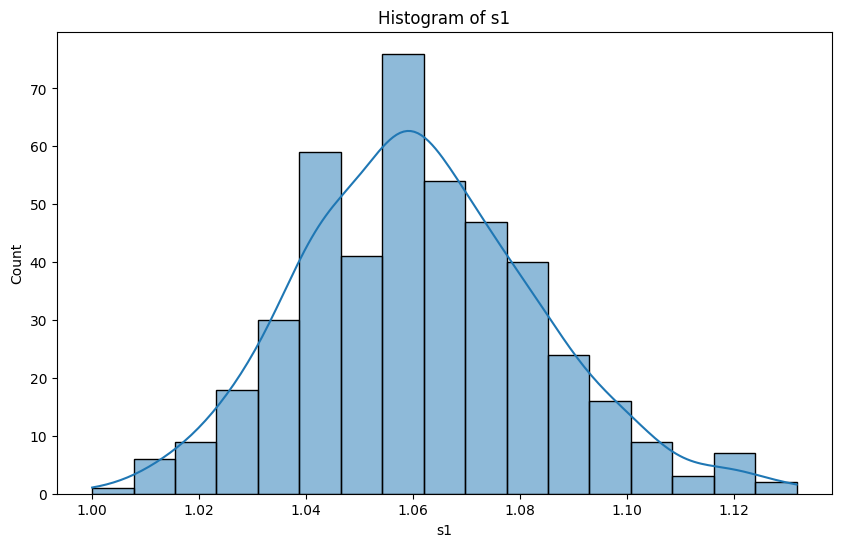

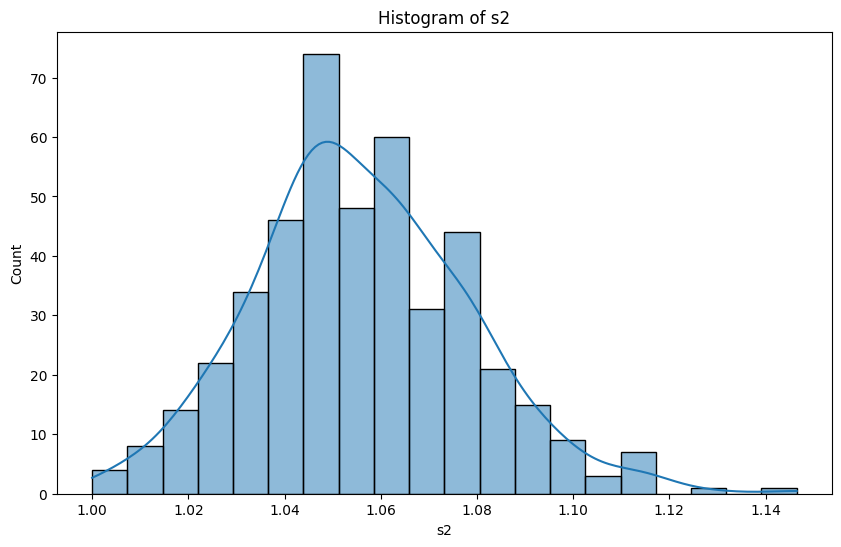

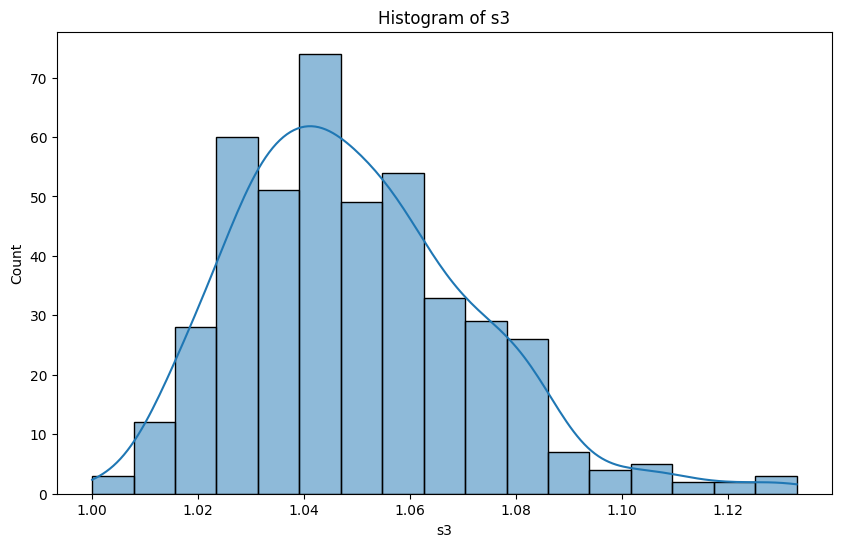

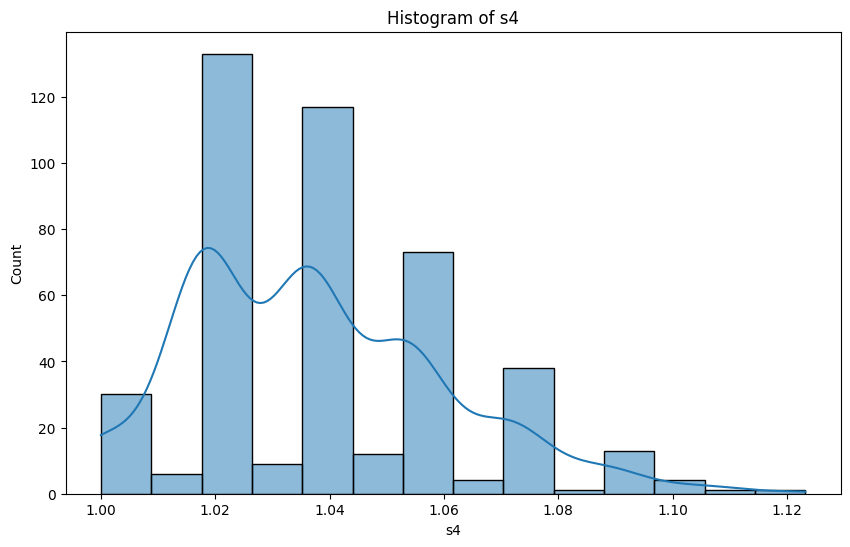

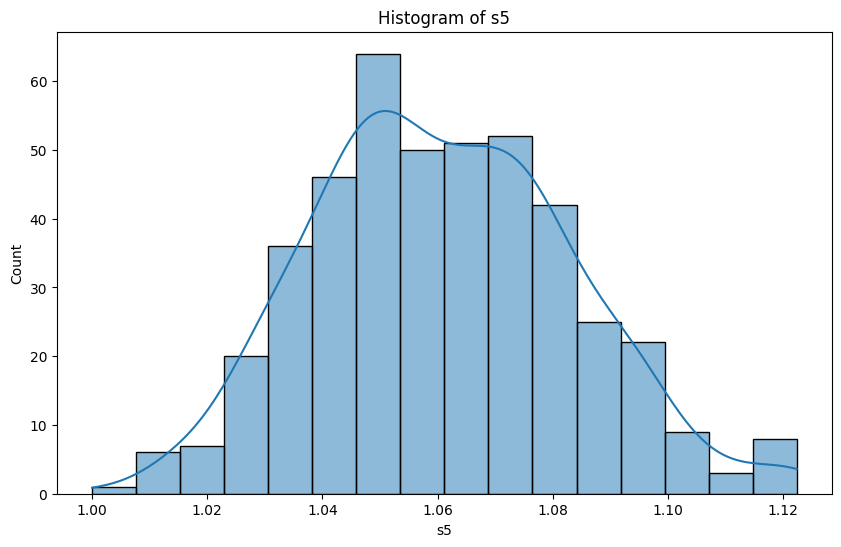

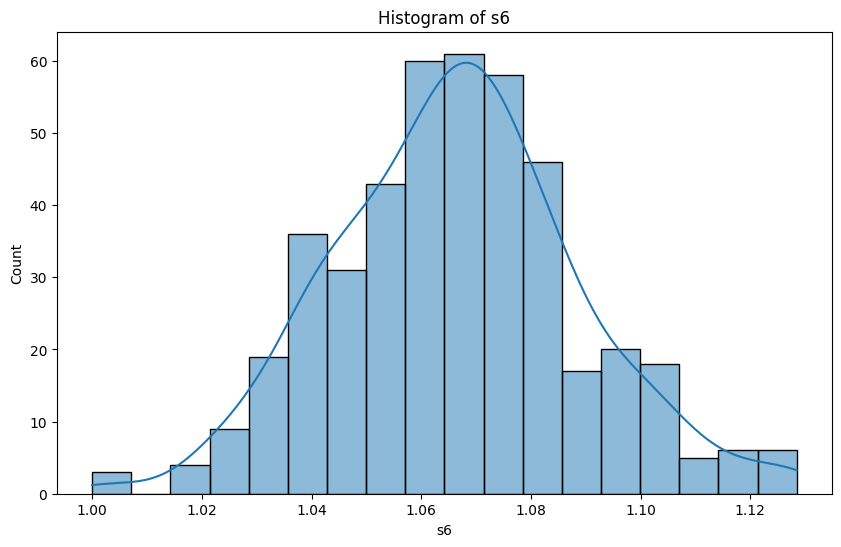

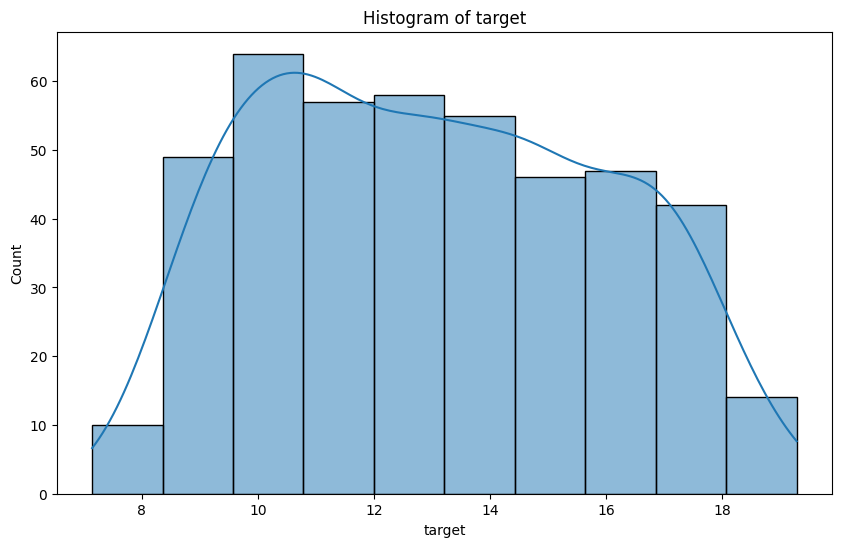

In [ ]:

for col in df1.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df1[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

In [ ]:
#Ordinal Encoding

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df1[['sex']] = oe.fit_transform(df1[['sex']])

In [ ]:
df1.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,1.070188,1.046576,1.073299,1.065022,1.040460,1.039612,1.029032,1.036244,1.070516,1.058358,13.304135
1,1.051353,1.000000,1.019216,1.042147,1.057512,1.047115,1.084767,1.018283,1.028477,1.022528,10.049876
2,1.092028,1.046576,1.065235,1.052012,1.039799,1.039913,1.034384,1.036244,1.062525,1.054437,12.922848
3,1.009040,1.000000,1.038595,1.037180,1.067226,1.067990,1.032603,1.053899,1.071814,1.062264,15.231546
4,1.054803,1.000000,1.026592,1.065022,1.063351,1.063583,1.053779,1.036244,1.045997,1.044570,12.688578


In [ ]:
# Define features (X)
X = df1.drop('target', axis=1)

# Define target (y)
y = df1['target']

In [ ]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [ ]:
# Normalize features using StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Building the ANN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define ANN architecture

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10,)))  # input layer (10 features) + hidden layer (64 units)
model.add(Dense(32, activation='relu'))  # hidden layer (32 units)
model.add(Dense(1))  # output layer (1 unit)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

##Training the ANN Model

In [ ]:
# Train model on training data
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 180.9720 - val_loss: 138.1606
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 152.2825 - val_loss: 119.9916
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 138.5203 - val_loss: 103.0727
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 120.0078 - val_loss: 84.4925
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 101.3855 - val_loss: 64.6152
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 72.7383 - val_loss: 44.9415
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 52.7743 - val_loss: 27.3219
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 33.0526 - val_loss: 14.4056
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.0321 - val_loss: 7.8221
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.1708 - val_loss: 6.6678
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.9921 - val_loss: 7.6028
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - l

##Evaluating the Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate model on testing data

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.3f}, R² Score: {r2:.3f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MSE: 7.492, R² Score: 0.019


Interpretation:

- MSE: An error of approximately 7.49 units squared. Lower values indicate better predictions.
- R² Score: Only 1.9% of the variance in the target variable is explained by the model. Higher values (closer to 1) indicate better fits.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,636 (22.02 KB)

##Improving the Model

In [ ]:
model.add(Dense(64, activation='tanh', input_shape=(10,)))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(1))

In [ ]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Train model on training data
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 190.7328 - val_loss: 156.6765
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 185.3050 - val_loss: 143.0924
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 158.6516 - val_loss: 106.7613
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 119.6686 - val_loss: 56.2353
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 52.6467 - val_loss: 16.7952
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.9176 - val_loss: 7.0036
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.5507 - val_loss: 12.7317
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.2944 - val_loss: 10.1137
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1871 - val_loss: 7.4058
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.9964 - val_loss: 6.7894
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.3309 - val_loss: 6.9423
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

In [ ]:

# Evaluate model on testing data

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.3f}, R² Score: {r2:.3f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
MSE: 7.732, R² Score: -0.013


R² Score: -0.013

- R² Score measures the proportion of variance explained by the model.
- A negative R² Score indicates the model performs worse than a baseline model that predicts the mean of the training data.

In [ ]:
model = Sequential()
model.add(Dense(128, activation='tanh', input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Train model on training data
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - loss: 171.5915 - val_loss: 125.5073
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 138.1534 - val_loss: 94.7211
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 104.7899 - val_loss: 62.2393
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 68.8120 - val_loss: 31.6180
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 36.3699 - val_loss: 10.7842
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.6742 - val_loss: 6.9383
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.4779 - val_loss: 10.5338
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.3388 - val_loss: 9.1977
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.8312 - val_loss: 7.2667
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.9027 - val_loss: 6.7787
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.6536 - val_loss: 6.8228
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 

In [ ]:
# Evaluate model on testing data

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.3f}, R² Score: {r2:.3f}")

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
MSE: 7.586, R² Score: 0.006


In [ ]:
# Add dropout regularization

from tensorflow.keras.layers import Dropout

model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Train with changed hyperparameters
model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2)

Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 183.6074 - val_loss: 156.2638
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 174.6943 - val_loss: 149.5077
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 171.5652 - val_loss: 139.2559
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 161.2995 - val_loss: 125.3808
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 144.4723 - val_loss: 107.7827
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 124.0520 - val_loss: 85.5401
Epoch 7/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 100.7420 - val_loss: 59.0823
Epoch 8/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 68.7295 - val_loss: 31.7008
Epoch 9/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 38.7058 - val_loss: 11.2216
Epoch 10/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.0715 - val_loss: 7.2247
Epoch 11/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.1739 - val_loss: 13.8384
Epoch 12/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

In [ ]:
# Evaluate model on testing data

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.3f}, R² Score: {r2:.3f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE: 7.244, R² Score: 0.051


MSE: 7.244

- A lower MSE indicates better performance.
- Current MSE is relatively high, indicating significant differences between predicted and actual values.

R² Score: 0.051

- R² Score measures the proportion of variance explained by the model.
- Current R² Score is relatively low, indicating room for improvement.


In [ ]:
# Define refined model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(10,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train refined model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 177.9184 - mean_absolute_error: 13.0017 - val_loss: 133.1052 - val_mean_absolute_error: 11.2434
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 144.2540 - mean_absolute_error: 11.6419 - val_loss: 94.1701 - val_mean_absolute_error: 9.3550
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 100.1152 - mean_absolute_error: 9.5164 - val_loss: 39.0927 - val_mean_absolute_error: 5.7024
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 36.2022 - mean_absolute_error: 5.2087 - val_loss: 6.5020 - val_mean_absolute_error: 2.1259
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.6204 - mean_absolute_error: 3.1294 - val_loss: 16.0599 - val_mean_absolute_error: 3.4522
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.2549 - mean_absolute_error: 3.5114 - val_loss: 6.8172 - val_mean_absolute_error: 2.1757
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.8625 - mean_absolute_error: 3.0294 - val_loss: 6.543

In [ ]:
# Evaluate model on testing data

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.3f}, R² Score: {r2:.3f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
MSE: 7.215, R² Score: 0.055


In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
# Define model architecture
class KerasModel(BaseEstimator):
    def __init__(self, learning_rate=0.01, dropout=0.2, input_dim=10):
        self.learning_rate = learning_rate
        self.dropout = dropout
        self.input_dim = input_dim
        self.model = None

    def fit(self, X, y):
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Dense(128, activation='relu', input_dim=self.input_dim))
        model.add(tf.keras.layers.Dropout(self.dropout))
        model.add(tf.keras.layers.Dense(64, activation='relu'))
        model.add(tf.keras.layers.Dense(32, activation='relu'))
        model.add(tf.keras.layers.Dense(1))

        optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        model.compile(loss='mean_squared_error', optimizer=optimizer)

        model.fit(X, y, epochs=50, batch_size=32, verbose=0)
        self.model = model
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        return -self.model.evaluate(X, y, verbose=0)

In [ ]:
# Define hyperparameter space
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout': [0.2, 0.5],
    'input_dim': [X_train.shape[1]]
}

In [ ]:
# Perform grid search
grid_search = GridSearchCV(estimator=KerasModel(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

GridSearchCV(cv=3, estimator=KerasModel(),
             param_grid={'dropout': [0.2, 0.5], 'input_dim': [5],
                         'learning_rate': [0.001, 0.01, 0.1]})

In [ ]:
# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'dropout': 0.5, 'input_dim': 5, 'learning_rate': 0.01}
Best Score: -2.4472206433614097


Best Parameters:

- dropout: 0.5 (50% dropout rate to prevent overfitting)
- input_dim: 5 (matches the number of features in dataset)
- learning_rate: 0.01 (optimal learning rate for convergence)

Best Score:

- -2.4472206433614097 (mean squared error, lower is better)

These results indicate that:

1. Higher dropout rate (0.5) helps prevent overfitting.
2. Optimal learning rate (0.01) facilitates convergence.
3. Model performs well with 5 input features.

In [ ]:
best_model = KerasModel(
    dropout=0.5,
    input_dim=5,
    learning_rate=0.01
)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate on test set
test_mse = best_model.model.evaluate(X_test, y_test, verbose=0)
print("Test MSE:", test_mse)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Test MSE: 3.1801578998565674


In [ ]:
# Evaluate model on testing data

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.3f}, R² Score: {r2:.3f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE: 3.180, R² Score: 0.583



Interpretation

- MSE: Lower values indicate better performance. A value of 3.180 suggests moderate accuracy.
- R² Score: Values range from 0 (worst) to 1 (best). A score of 0.583 indicates moderate explanatory power.

Hyperparameters: dropout=0.5, input_dim=5, learning_rate=0.01